# GEOG 5160 6160 Lab 08

## Data processing

Let's start by by importing the modules we'll need for the class, then we'll go get the data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
## Set random seed for reproducibility
np.random.seed(1234)

### California housing data

We'll start by reading in and plotting the California housing dataset. The following code reads the file and cleans up the data. We then create two data sets to show how the algorithm works, one with only the coordinates as features, and the other with the usual set of house characteristics as features. The only new code here divides the house values by 1000 to help in displaying some of the output. Refer back to the previous labs for explanations of this code:

In [2]:
housing = pd.read_csv("../datafiles/housing.csv")
print(housing.shape)

(20640, 10)


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


First use the `dropna()` method to remove missing values:

In [4]:
housing = housing.dropna()
housing.shape

(20433, 10)

Next, we'll transform the data. 

In [5]:
ocean_cats = housing.ocean_proximity != "INLAND" ## Conditional to make two groups inland vs all others
ocean_cats = ocean_cats.astype('category') ## Convert to categorical
ocean_cats = ocean_cats.cat.codes ## Extract the code numerical labels (0/1)
housing['ocean_new'] = ocean_cats ## Replace original ocean_proximity

In [6]:
housing['avg_rooms'] = housing.total_rooms / housing.households
housing['bedroom_ratio'] = housing.total_bedrooms / housing.total_rooms
housing.median_house_value = housing.median_house_value / 1000

Remove the capped districts

In [7]:
housing = housing[housing.median_house_value <= 500000]

Now let's look at the new data

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_new,avg_rooms,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206.864413,0.682083,5.431344,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115.435667,0.465678,2.482946,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000,0.000000,0.846154,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119.500000,0.000000,4.441441,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179.700000,1.000000,5.230769,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264.700000,1.000000,6.052381,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000,1.000000,141.909091,1.000000


In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_new,avg_rooms,bedroom_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452.6,NEAR BAY,1,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358.5,NEAR BAY,1,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352.1,NEAR BAY,1,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341.3,NEAR BAY,1,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342.2,NEAR BAY,1,6.281853,0.172096


### Pinus edulis data

Next, we'll read the known locations of *Pinus edulis* trees from the file *Pinus_edulis.csv*, and plot to check the data

In [10]:
presence = pd.read_csv("../datafiles/Pinus_edulis.csv")
presence.describe()

,gbifid,latitude,longitude
count,2.990000e+02,299.000000,299.000000
mean,1.572063e+09,36.275753,-108.587322
std,3.916628e+08,2.061340,3.096906
min,5.662771e+07,31.707778,-115.585586
25%,1.453172e+09,35.161349,-111.825712
50%,1.677271e+09,36.066280,-108.347447
75%,1.847535e+09,37.671059,-105.833923
max,1.899817e+09,40.894330,-102.947806


In [11]:
absence = pd.read_csv("../datafiles/absence.csv")
absence.describe()

,longitude,latitude
count,299.000000,299.000000
mean,-109.292623,36.644873
std,3.969942,3.079582
min,-117.353659,30.033673
25%,-112.247613,34.226212
50%,-109.372950,36.786324
75%,-106.106656,39.117459
max,-100.861639,42.491026


In [12]:
lon = presence.longitude.append(absence.longitude).values

In [13]:
lat = presence.latitude.append(absence.latitude).values

In [14]:
pa = pd.Series([1, 0]).repeat(299).values

In [15]:
frame = { 'longitude': lon, 
         'latitude': lat,
         'pa': pa
        } 
pe = pd.DataFrame(frame)
pe.describe()

,longitude,latitude,pa
count,598.000000,598.000000,598.000000
mean,-108.939973,36.460313,0.500000
std,3.574768,2.624708,0.500419
min,-117.353659,30.033673,0.000000
25%,-111.962634,34.874440,0.000000
50%,-108.952680,36.375596,0.500000
75%,-105.889698,38.455610,1.000000
max,-100.861639,42.491026,1.000000


In [16]:
import xarray as xr
curr_env = xr.open_dataset('../datafiles/current_env.nc')
curr_env.info
#curr_env['variable'].sel(lon=-107, lat=40)

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (latitude: 480, longitude: 720, z: 19)
Coordinates:
  * longitude  (longitude) float64 -130.0 -129.9 -129.9 ... -100.1 -100.1 -100.0
  * latitude   (latitude) float64 49.98 49.94 49.9 49.85 ... 30.1 30.06 30.02
  * z          (z) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    crs        int32 ...
    BIO        (z, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-03-10 13:49:36>

In [17]:
lons = xr.DataArray(pe.longitude, dims='x')
lats = xr.DataArray(pe.latitude, dims='x')

In [18]:
data = curr_env.BIO.sel(latitude = lats, longitude = lons, method = 'nearest')
data.values

array([[  8. ,   6.4,   5.8, ...,  11.8,  16. ,  11.8],
       [ 16.6,  16.7,  16.2, ...,  17.7,  17.3,  16.8],
       [  4.2,   4.2,   4.2, ...,   4.5,   4.5,   4.2],
       ...,
       [ 34. ,  38. ,  43. , ...,  41. ,  31. ,  41. ],
       [194. , 204. , 214. , ..., 142. , 155. ,  49. ],
       [ 34. ,  38. ,  43. , ...,  47. ,  33. ,  60. ]], dtype=float32)

In [19]:
var_names = ["bio"+str(i+1) for i in range(19)]
x = pd.DataFrame(data.values.transpose(),
                columns = var_names)
x

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,18.500000,-1.7,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
1,6.4,16.700001,4.2,778.099976,27.000000,-12.1,39.099998,16.700001,-3.2,16.700001,-3.2,452.0,76.0,10.0,59.0,204.0,38.0,204.0,38.0
2,5.8,16.200001,4.2,778.000000,26.100000,-12.4,38.500000,16.100000,-3.8,16.100000,-3.8,474.0,81.0,11.0,58.0,214.0,43.0,214.0,43.0
3,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,18.500000,-1.7,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
4,8.2,16.400000,4.1,792.900024,28.900000,-10.2,39.099998,18.799999,-1.5,18.799999,-1.5,426.0,72.0,9.0,60.0,194.0,34.0,194.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,13.4,16.700001,4.2,800.900024,32.500000,-6.4,38.900002,23.600000,3.0,23.600000,3.0,444.0,74.0,11.0,61.0,203.0,37.0,203.0,37.0
594,7.9,15.700000,3.4,985.799988,31.299999,-13.6,44.900002,15.200000,-5.2,20.400000,-5.2,242.0,26.0,14.0,20.0,78.0,45.0,66.0,45.0
595,11.8,17.700001,4.5,762.299988,31.600000,-6.9,38.500000,20.700001,7.1,21.700001,2.1,321.0,64.0,13.0,64.0,164.0,41.0,142.0,47.0
596,16.0,17.299999,4.5,757.799988,34.500000,-3.6,38.099998,24.500000,7.9,25.600000,6.1,358.0,64.0,9.0,66.0,174.0,31.0,155.0,33.0


In [20]:
pe

,longitude,latitude,pa
0,-104.896667,38.866005,1
1,-104.883196,38.875486,1
2,-104.839340,38.722775,1
3,-104.897199,38.864713,1
4,-104.855046,38.908459,1
...,...,...,...
593,-102.534971,34.525225,0
594,-109.901510,39.715135,0
595,-106.530940,34.174115,0
596,-103.782630,32.707550,0


In [21]:
pe = pd.concat([pe, x], axis=1)
pe

,longitude,latitude,pa,bio1,bio2,bio3,bio4,bio5,bio6,bio7,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,-104.896667,38.866005,1,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,...,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
1,-104.883196,38.875486,1,6.4,16.700001,4.2,778.099976,27.000000,-12.1,39.099998,...,16.700001,-3.2,452.0,76.0,10.0,59.0,204.0,38.0,204.0,38.0
2,-104.839340,38.722775,1,5.8,16.200001,4.2,778.000000,26.100000,-12.4,38.500000,...,16.100000,-3.8,474.0,81.0,11.0,58.0,214.0,43.0,214.0,43.0
3,-104.897199,38.864713,1,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,...,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
4,-104.855046,38.908459,1,8.2,16.400000,4.1,792.900024,28.900000,-10.2,39.099998,...,18.799999,-1.5,426.0,72.0,9.0,60.0,194.0,34.0,194.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,-102.534971,34.525225,0,13.4,16.700001,4.2,800.900024,32.500000,-6.4,38.900002,...,23.600000,3.0,444.0,74.0,11.0,61.0,203.0,37.0,203.0,37.0
594,-109.901510,39.715135,0,7.9,15.700000,3.4,985.799988,31.299999,-13.6,44.900002,...,20.400000,-5.2,242.0,26.0,14.0,20.0,78.0,45.0,66.0,45.0
595,-106.530940,34.174115,0,11.8,17.700001,4.5,762.299988,31.600000,-6.9,38.500000,...,21.700001,2.1,321.0,64.0,13.0,64.0,164.0,41.0,142.0,47.0
596,-103.782630,32.707550,0,16.0,17.299999,4.5,757.799988,34.500000,-3.6,38.099998,...,25.600000,6.1,358.0,64.0,9.0,66.0,174.0,31.0,155.0,33.0


In [22]:
import geopandas as gpd
pe_gpd = gpd.GeoDataFrame(pe, 
                          geometry=gpd.points_from_xy(pe.longitude, pe.latitude), 
                               crs=4326)

<AxesSubplot:>

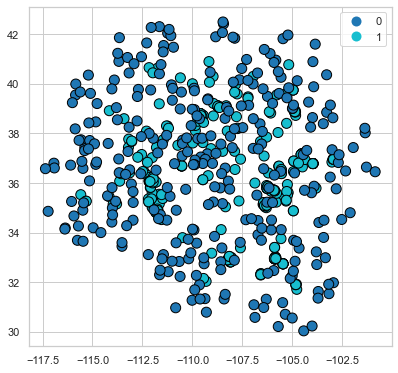

In [23]:
pe_gpd.plot(column="pa", figsize = (6.5, 6.5), categorical=True, 
            markersize = 100, legend=True, edgecolor="black")

<AxesSubplot:>

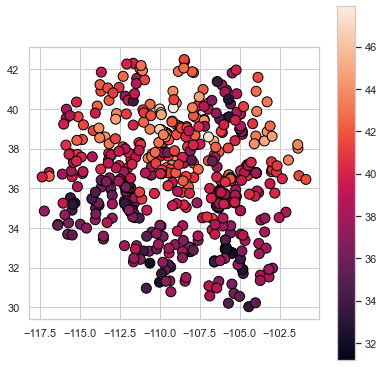

In [24]:
pe_gpd.plot(column="bio7", figsize = (6.5, 6.5), 
            markersize = 100, legend=True, edgecolor="black")

In [25]:
pe

,longitude,latitude,pa,bio1,bio2,bio3,bio4,bio5,bio6,bio7,...,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,geometry
0,-104.896667,38.866005,1,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,...,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0,POINT (-104.89667 38.86601)
1,-104.883196,38.875486,1,6.4,16.700001,4.2,778.099976,27.000000,-12.1,39.099998,...,-3.2,452.0,76.0,10.0,59.0,204.0,38.0,204.0,38.0,POINT (-104.88320 38.87549)
2,-104.839340,38.722775,1,5.8,16.200001,4.2,778.000000,26.100000,-12.4,38.500000,...,-3.8,474.0,81.0,11.0,58.0,214.0,43.0,214.0,43.0,POINT (-104.83934 38.72277)
3,-104.897199,38.864713,1,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,...,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0,POINT (-104.89720 38.86471)
4,-104.855046,38.908459,1,8.2,16.400000,4.1,792.900024,28.900000,-10.2,39.099998,...,-1.5,426.0,72.0,9.0,60.0,194.0,34.0,194.0,34.0,POINT (-104.85505 38.90846)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,-102.534971,34.525225,0,13.4,16.700001,4.2,800.900024,32.500000,-6.4,38.900002,...,3.0,444.0,74.0,11.0,61.0,203.0,37.0,203.0,37.0,POINT (-102.53497 34.52522)
594,-109.901510,39.715135,0,7.9,15.700000,3.4,985.799988,31.299999,-13.6,44.900002,...,-5.2,242.0,26.0,14.0,20.0,78.0,45.0,66.0,45.0,POINT (-109.90151 39.71513)
595,-106.530940,34.174115,0,11.8,17.700001,4.5,762.299988,31.600000,-6.9,38.500000,...,2.1,321.0,64.0,13.0,64.0,164.0,41.0,142.0,47.0,POINT (-106.53094 34.17411)
596,-103.782630,32.707550,0,16.0,17.299999,4.5,757.799988,34.500000,-3.6,38.099998,...,6.1,358.0,64.0,9.0,66.0,174.0,31.0,155.0,33.0,POINT (-103.78263 32.70755)


In [26]:
type(pe_gpd)

geopandas.geodataframe.GeoDataFrame

## Tree methods

### Classification and regression trees

#### Regression trees

In [27]:
from sklearn import tree
from sklearn.model_selection import train_test_split
var_names = ['longitude', 'latitude']
X = housing[var_names]
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8)

In [28]:
ca_tree = tree.DecisionTreeRegressor()
ca_tree = ca_tree.fit(X_train, y_train)

In [29]:
r = tree.export_text(ca_tree, feature_names = var_names)
print(r)

|--- latitude <= 37.94
|   |--- longitude <= -121.87
|   |   |--- latitude <= 37.59
|   |   |   |--- longitude <= -122.05
|   |   |   |   |--- latitude <= 37.20
|   |   |   |   |   |--- latitude <= 36.99
|   |   |   |   |   |   |--- latitude <= 36.97
|   |   |   |   |   |   |   |--- longitude <= -122.06
|   |   |   |   |   |   |   |   |--- value: [258.30]
|   |   |   |   |   |   |   |--- longitude >  -122.06
|   |   |   |   |   |   |   |   |--- value: [226.50]
|   |   |   |   |   |   |--- latitude >  36.97
|   |   |   |   |   |   |   |--- longitude <= -122.09
|   |   |   |   |   |   |   |   |--- value: [350.00]
|   |   |   |   |   |   |   |--- longitude >  -122.09
|   |   |   |   |   |   |   |   |--- value: [320.90]
|   |   |   |   |   |--- latitude >  36.99
|   |   |   |   |   |   |--- longitude <= -122.06
|   |   |   |   |   |   |   |--- longitude <= -122.17
|   |   |   |   |   |   |   |   |--- value: [284.10]
|   |   |   |   |   |   |   |--- longitude >  -122.17
|   |   |   |   |   

In [30]:
ca_tree = tree.DecisionTreeRegressor(max_depth = 3)
ca_tree = ca_tree.fit(X_train, y_train)
r = tree.export_text(ca_tree, feature_names = var_names)
print(r)

|--- latitude <= 37.94
|   |--- longitude <= -121.87
|   |   |--- latitude <= 37.59
|   |   |   |--- value: [322.27]
|   |   |--- latitude >  37.59
|   |   |   |--- value: [263.82]
|   |--- longitude >  -121.87
|   |   |--- latitude <= 34.49
|   |   |   |--- value: [223.29]
|   |   |--- latitude >  34.49
|   |   |   |--- value: [130.07]
|--- latitude >  37.94
|   |--- latitude <= 39.06
|   |   |--- longitude <= -122.38
|   |   |   |--- value: [215.06]
|   |   |--- longitude >  -122.38
|   |   |   |--- value: [141.16]
|   |--- latitude >  39.06
|   |   |--- latitude <= 39.35
|   |   |   |--- value: [120.14]
|   |   |--- latitude >  39.35
|   |   |   |--- value: [86.10]



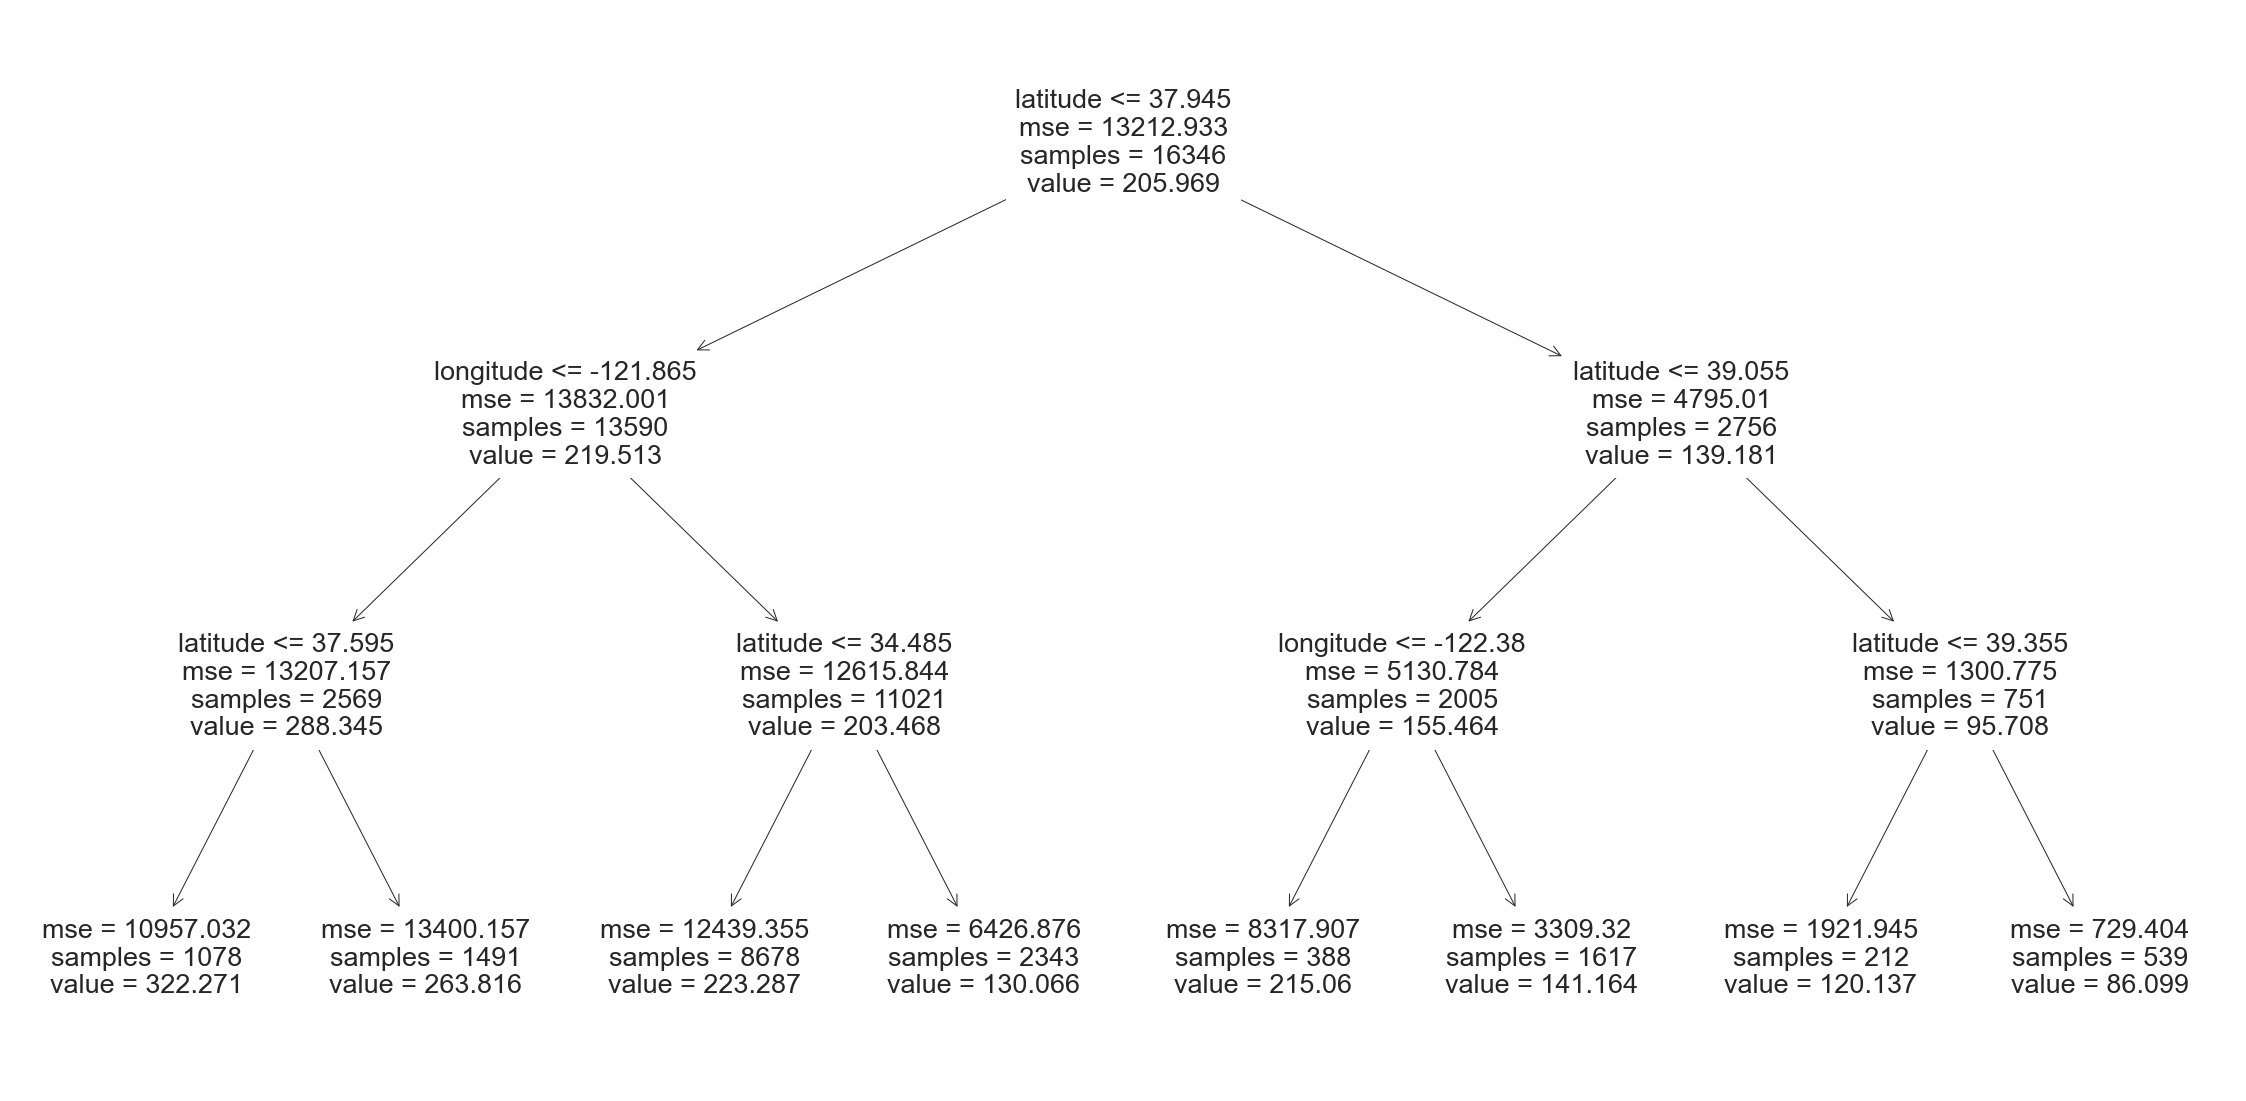

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) 
tree.plot_tree(ca_tree, feature_names = var_names)
plt.show()

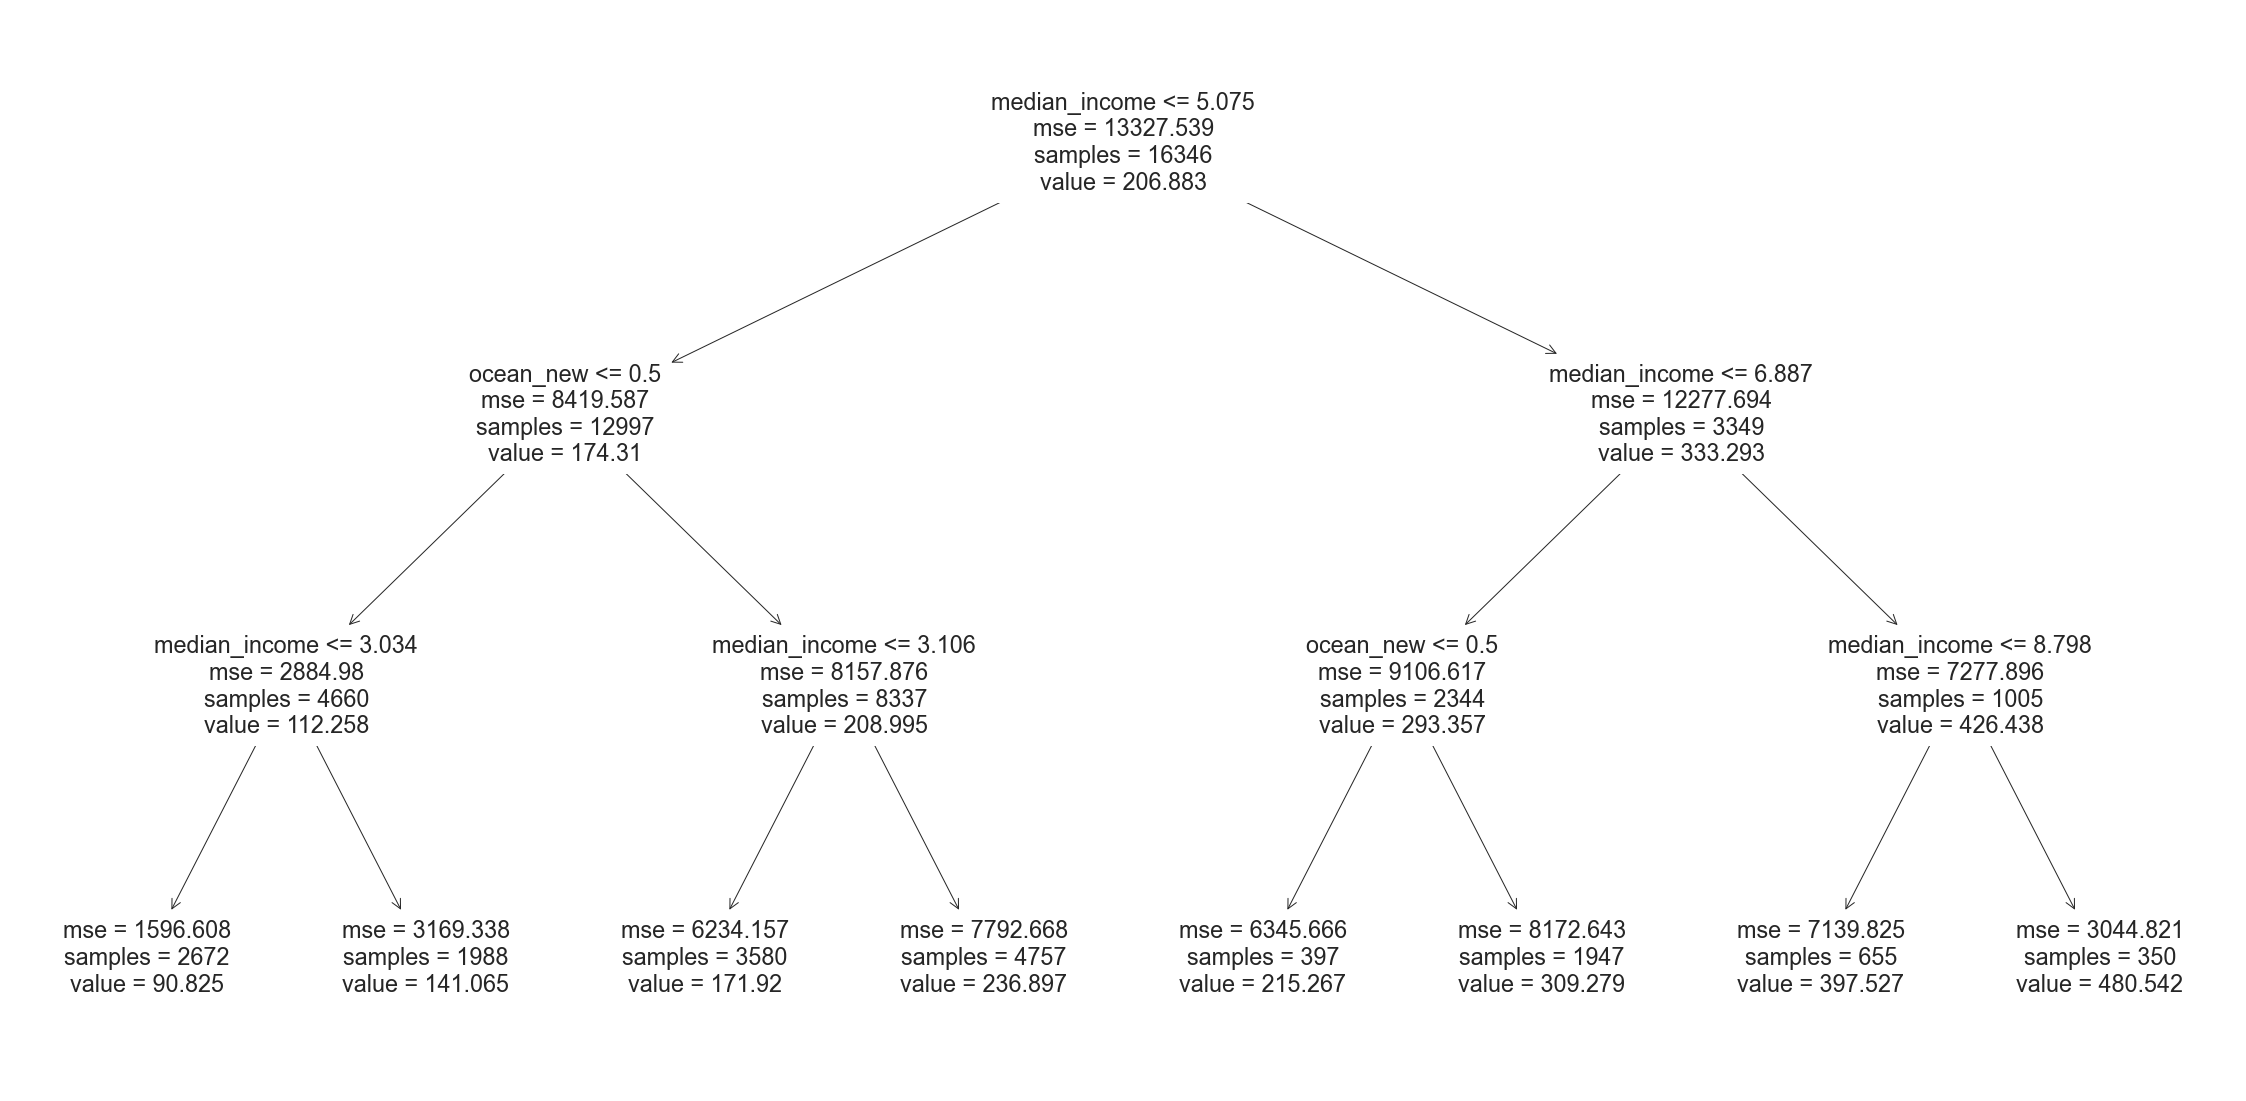

In [32]:
var_names = ['avg_rooms', 'bedroom_ratio', 'housing_median_age',
            'population', 'households', 'median_income', 'ocean_new']
X = housing[var_names]
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8)
ca_tree = tree.DecisionTreeRegressor(max_depth = 3)
ca_tree = ca_tree.fit(X_train, y_train)

plt.figure(figsize=(40,20)) 
tree.plot_tree(ca_tree, feature_names = var_names)
plt.show()

#### Classification trees

In [33]:
var_names = ["bio"+str(i+1) for i in range(19)]

X = pe[var_names]
y = pe['pa']

In [34]:
X.columns

Index(['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19'],
      dtype='object')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(478, 19)
(478,)
(120, 19)
(120,)


In [37]:
pe_tree = tree.DecisionTreeClassifier()
pe_tree = pe_tree.fit(X_train, y_train)

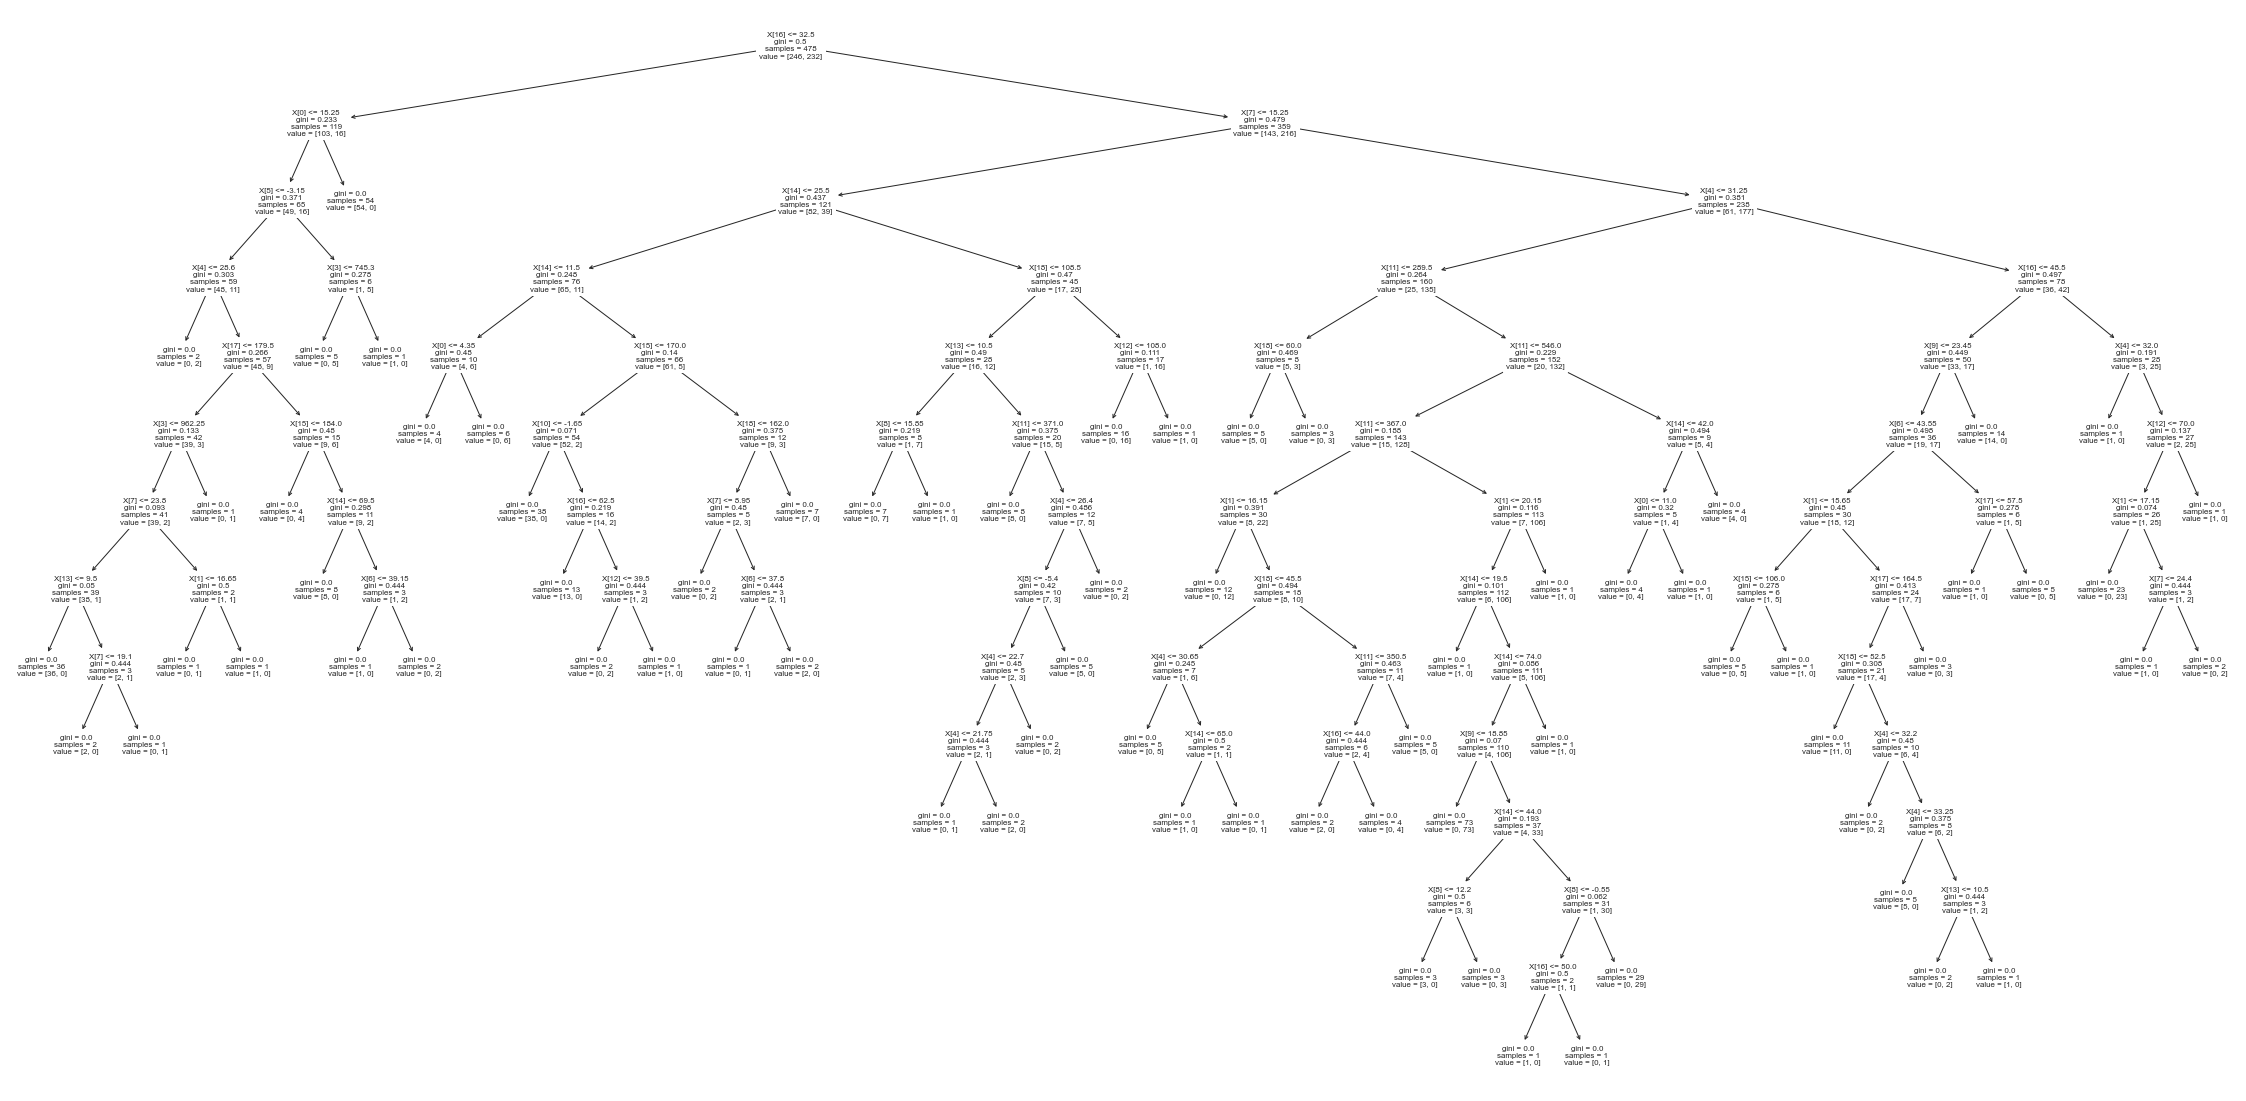

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) 
tree.plot_tree(pe_tree)
plt.show()

In [39]:
path = pe_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

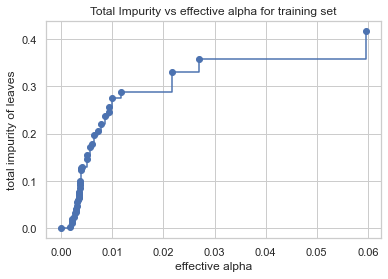

In [40]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [41]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08163076497684496


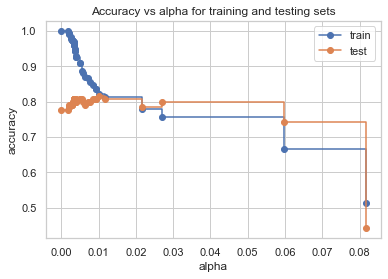

In [42]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Setting alpha to 0.025 should work here

In [43]:
X_train.shape

(478, 19)

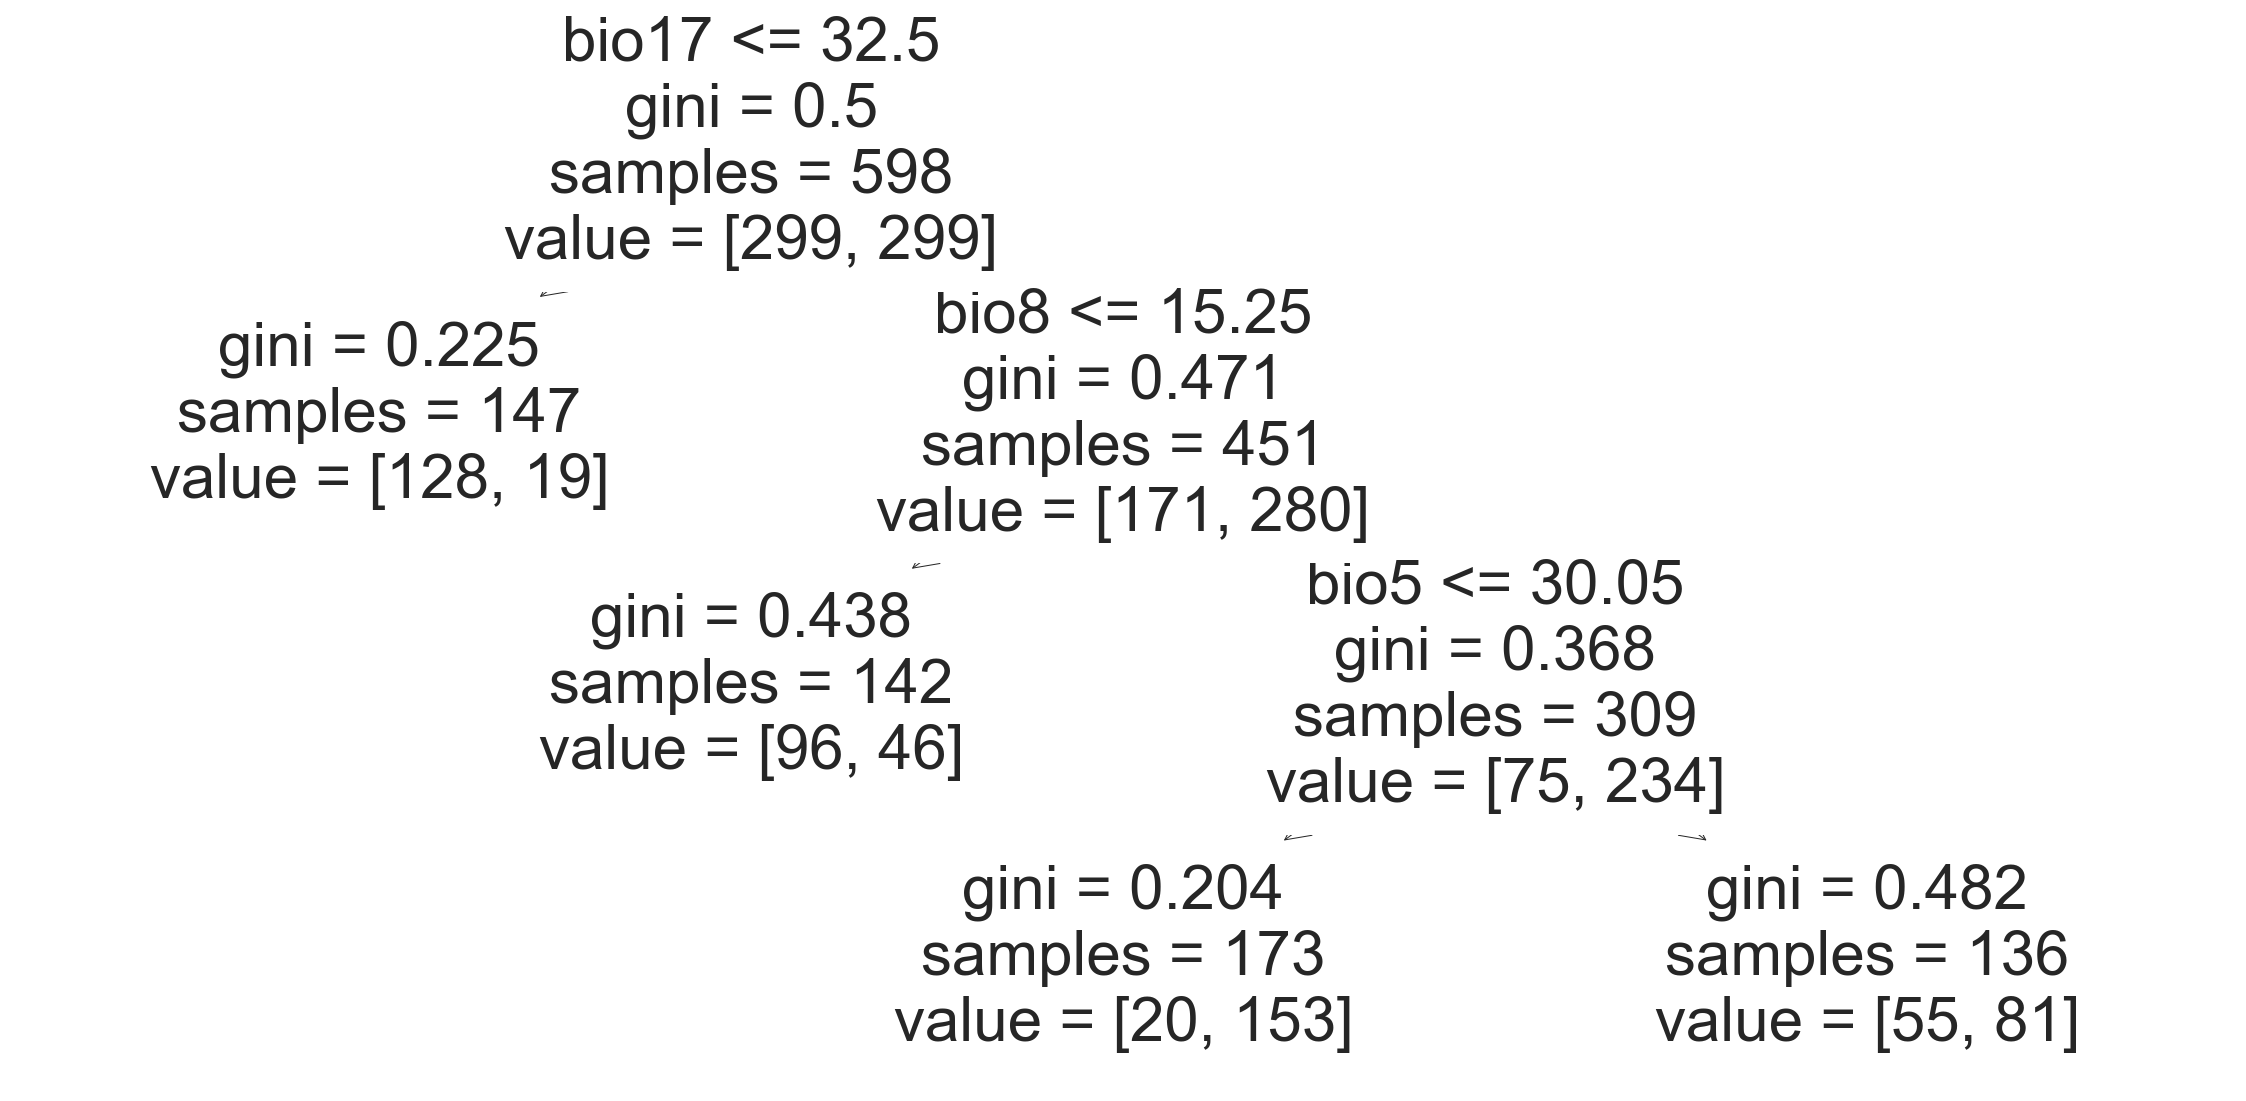

In [44]:
pe_tree = tree.DecisionTreeClassifier(ccp_alpha = 0.02)
pe_tree = pe_tree.fit(X, y)
plt.figure(figsize=(40,20)) 
tree.plot_tree(pe_tree, feature_names = X_train.columns)
plt.show()

Add a graphviz example

### Tuning

In [45]:
tree.DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [61]:
from sklearn.model_selection import GridSearchCV
tree_param = {'max_depth':[4,5,6,7,8,9,10],
             'min_samples_leaf':[5,6,7,8,9,10]}

pe_tree_tuned = GridSearchCV(tree.DecisionTreeClassifier(), tree_param, cv=5)

pe_tree_tuned.fit(X_train, y_train)

pe_tree_tuned.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [62]:
print('Best max_depth:', pe_tree_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', pe_tree_tuned.best_estimator_.get_params()['min_samples_leaf'])

Best max_depth: 8
Best min_samples_leaf: 9


In [63]:
from sklearn.metrics import roc_auc_score
y_test_pred = pe_tree_tuned.predict_proba(X_test)
y_test_pred
roc_auc_score(y_test, y_test_pred[:,1])

0.8471264367816091

Based on an example from https://machinelearningmastery.com/

In [70]:
from sklearn.metrics import accuracy_score
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = tree.DecisionTreeClassifier()
    # define search
    search = GridSearchCV(model, tree_param, scoring='roc_auc', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    y_test_pred = best_model.predict_proba(X_test)
    # evaluate the model
    auc = roc_auc_score(y_test, y_test_pred[:,1])
    # store the result
    outer_results.append(auc)
    # report progress
    print('>auc=%.3f, est=%.3f, cfg=%s' % (auc, result.best_score_, result.best_params_))
print('ROC AUC: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

>auc=0.871, est=0.822, cfg={'max_depth': 8, 'min_samples_leaf': 9}
>auc=0.914, est=0.823, cfg={'max_depth': 9, 'min_samples_leaf': 8}
>auc=0.842, est=0.824, cfg={'max_depth': 9, 'min_samples_leaf': 7}
>auc=0.918, est=0.856, cfg={'max_depth': 5, 'min_samples_leaf': 7}
>auc=0.722, est=0.857, cfg={'max_depth': 10, 'min_samples_leaf': 9}
>auc=0.911, est=0.817, cfg={'max_depth': 9, 'min_samples_leaf': 7}
>auc=0.802, est=0.844, cfg={'max_depth': 7, 'min_samples_leaf': 7}
>auc=0.880, est=0.829, cfg={'max_depth': 10, 'min_samples_leaf': 9}
>auc=0.851, est=0.841, cfg={'max_depth': 10, 'min_samples_leaf': 9}
>auc=0.868, est=0.799, cfg={'max_depth': 4, 'min_samples_leaf': 7}
ROC AUC: 0.858 (0.057)


In [90]:
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = tree.DecisionTreeClassifier()
# define search
search = GridSearchCV(model, tree_param, scoring='roc_auc', 
                      n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='roc_auc', cv=cv_outer, n_jobs=-1)
# report performance
print('ROC AUC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

ROC AUC: 0.857 (0.047)


In [86]:
search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## Random forest

In [73]:
from sklearn import ensemble
ensemble.RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
rf_param = {'n_estimators':[100, 200, 300, 400, 500],
             'max_features':[2,4,6]}

In [97]:
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = ensemble.RandomForestClassifier()
    # define search
    search = GridSearchCV(model, rf_param, scoring='roc_auc', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    y_test_pred = best_model.predict_proba(X_test)
    # evaluate the model
    auc = roc_auc_score(y_test, y_test_pred[:,1])
    # store the result
    outer_results.append(auc)
    # report progress
    print('>auc=%.3f, est=%.3f, cfg=%s' % (auc, result.best_score_, result.best_params_))
print('ROC AUC: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

>auc=0.909, est=0.893, cfg={'max_features': 2, 'n_estimators': 100}
>auc=0.920, est=0.889, cfg={'max_features': 2, 'n_estimators': 400}
>auc=0.891, est=0.906, cfg={'max_features': 2, 'n_estimators': 400}
>auc=0.951, est=0.910, cfg={'max_features': 2, 'n_estimators': 400}
>auc=0.765, est=0.922, cfg={'max_features': 2, 'n_estimators': 200}
>auc=0.954, est=0.907, cfg={'max_features': 2, 'n_estimators': 200}
>auc=0.916, est=0.899, cfg={'max_features': 2, 'n_estimators': 200}
>auc=0.972, est=0.910, cfg={'max_features': 2, 'n_estimators': 300}
>auc=0.902, est=0.911, cfg={'max_features': 4, 'n_estimators': 500}
>auc=0.946, est=0.887, cfg={'max_features': 2, 'n_estimators': 100}
ROC AUC: 0.913 (0.055)


In [98]:
pe_rf = ensemble.RandomForestClassifier()
pe_rf.fit(X, y)

RandomForestClassifier()

In [99]:
pe_rf.feature_importances_

array([0.0816007 , 0.03873408, 0.02695404, 0.04653719, 0.07769655,
       0.04611422, 0.04979041, 0.06574939, 0.03744615, 0.06297135,
       0.0646111 , 0.05667252, 0.03169949, 0.04502703, 0.04878648,
       0.03058602, 0.10402021, 0.03925173, 0.04575136])

In [103]:
importances = pe_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], var_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 16 bio17 (0.104020)
2. feature 0 bio1 (0.081601)
3. feature 4 bio5 (0.077697)
4. feature 7 bio8 (0.065749)
5. feature 10 bio11 (0.064611)
6. feature 9 bio10 (0.062971)
7. feature 11 bio12 (0.056673)
8. feature 6 bio7 (0.049790)
9. feature 14 bio15 (0.048786)
10. feature 3 bio4 (0.046537)
11. feature 5 bio6 (0.046114)
12. feature 18 bio19 (0.045751)
13. feature 13 bio14 (0.045027)
14. feature 17 bio18 (0.039252)
15. feature 1 bio2 (0.038734)
16. feature 8 bio9 (0.037446)
17. feature 12 bio13 (0.031699)
18. feature 15 bio16 (0.030586)
19. feature 2 bio3 (0.026954)


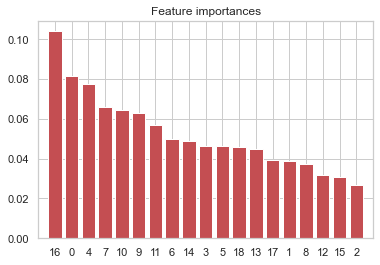

In [105]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

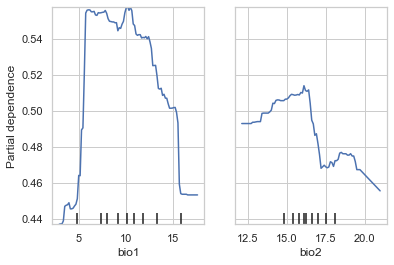

In [108]:
from sklearn.inspection import plot_partial_dependence
features = [0, 1, (0, 1)]
#plot_partial_dependence(pe_rf, X, features) 
plot_partial_dependence(pe_rf, X, [0,1]) 

### XGBoost